In [33]:
# Libraries

In [29]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.patches as patches
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights
import numpy as np
import time
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from tabulate import tabulate

In [35]:
# Loading Models

In [7]:
# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES) 

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
# Yolo Model

In [11]:
model = YOLO("yolov8m.pt")

In [13]:
# Image 1
results_1 = model.predict("Img 1.jpg") 

result_1 = results_1[0]

# Image 2
results_2 = model.predict("Img 2.jpg")

result_2 = results_2[0]

# Image 3
results_3 = model.predict("Img 3.jpg")

result_3 = results_3[0]

# Image 4
results_4 = model.predict("Img 4.jpg")

result_4 = results_4[0]

# Image 5
results_5 = model.predict("Img 5.jpg")

result_5 = results_5[0]


image 1/1 /Users/dovekerry/Img 1.jpg: 416x640 1 suitcase, 1 bottle, 1 chair, 1 couch, 3 potted plants, 2 tvs, 1 book, 4 clocks, 2 vases, 212.2ms
Speed: 7.0ms preprocess, 212.2ms inference, 8.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /Users/dovekerry/Img 2.jpg: 480x640 1 person, 5 chairs, 11 potted plants, 3 dining tables, 1 oven, 1 book, 1 vase, 228.1ms
Speed: 3.3ms preprocess, 228.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /Users/dovekerry/Img 3.jpg: 640x512 1 bicycle, 256.1ms
Speed: 2.0ms preprocess, 256.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /Users/dovekerry/Img 4.jpg: 384x640 8 persons, 8 umbrellas, 6 chairs, 2 potted plants, 196.6ms
Speed: 1.2ms preprocess, 196.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/dovekerry/Img 5.jpg: 448x640 2 persons, 1 dog, 1 sports ball, 1 dining table, 216.8ms
Speed: 2.3ms preprocess, 216.8ms inference, 0.7ms po

In [15]:
# Faster RCNN Model

/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


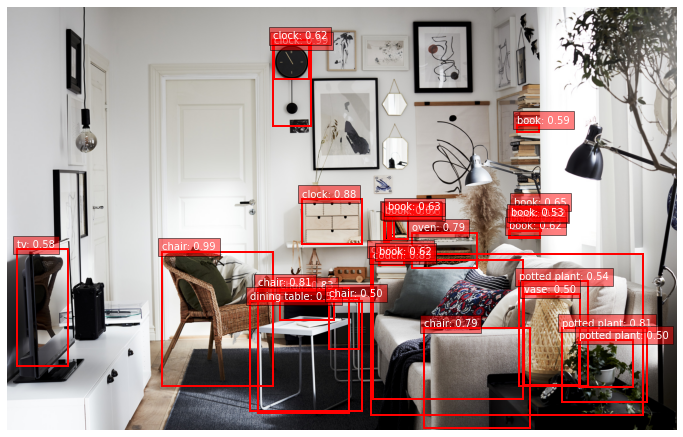

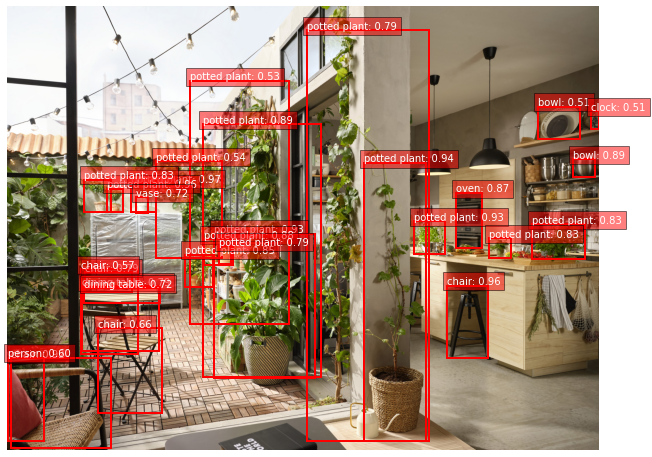

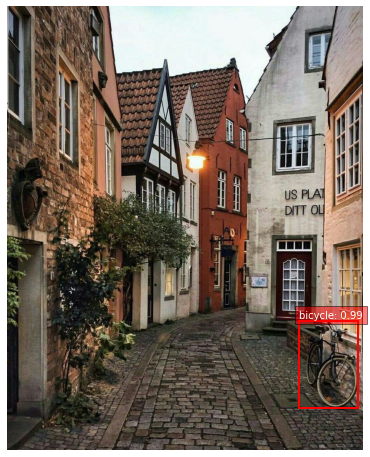

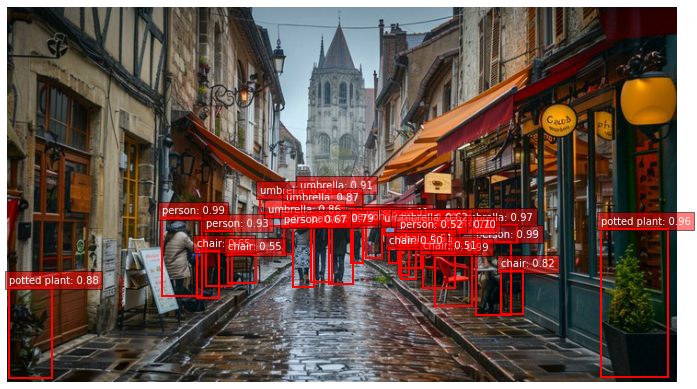

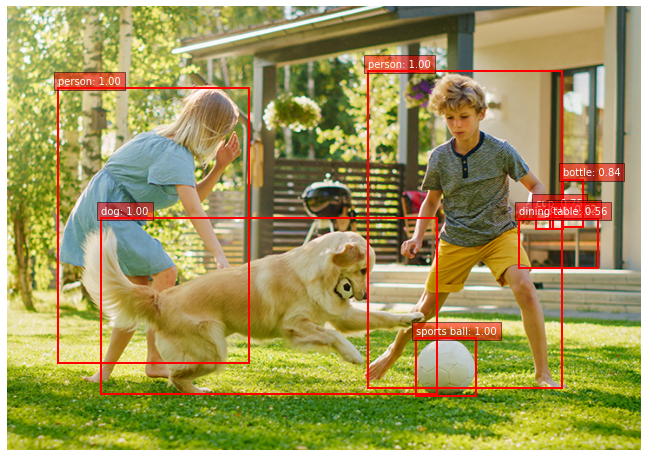

In [17]:
from torchvision.models import detection
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Define the list of image paths
image_paths = ["Img 1.jpg", "Img 2.jpg", "Img 3.jpg", "Img 4.jpg", "Img 5.jpg"]  # Add your image paths here

# Define a confidence threshold
confidence_threshold = 0.5

# Step 3: Process each image
for image_path in image_paths:
    # Load the image
    image = Image.open(image_path)
    image_tensor = F.to_tensor(image)  # Convert the image to a tensor

    # Perform object detection
    with torch.no_grad():
        predictions = model([image_tensor])

    # Extract predictions
    predicted_boxes = predictions[0]['boxes']
    predicted_scores = predictions[0]['scores']
    predicted_labels = predictions[0]['labels']

    # Filter predictions by confidence threshold
    filtered_boxes = []
    filtered_scores = []
    filtered_labels = []

    for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
        if score >= confidence_threshold:
            filtered_boxes.append(box)
            filtered_scores.append(score)
            filtered_labels.append(label)

    # Annotate the image with bounding boxes and class names
    fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
    ax.imshow(image)

    for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
        x_min, y_min, x_max, y_max = box.tolist()
        class_name = COCO_CLASSES[label.item()]  # Map label to class name

        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)

        # Add the class name and score as text
        ax.text(
            x_min,
            y_min - 5,
            f"{class_name}: {score:.2f}",
            color='white',
            fontsize=10,
            bbox=dict(facecolor='red', alpha=0.5)
        )

    plt.axis("off")  # Hide axes for better visualization
    plt.show()

In [37]:
# Load pre-trained weights and metadata
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch class names dynamically

# Initialize Faster R-CNN and YOLO models
faster_rcnn = fasterrcnn_resnet50_fpn(weights=weights).eval()
yolo_model = YOLO("yolov8m.pt")

# Confidence threshold
confidence_threshold = 0.5

# Images to process
image_paths = ["Img 1.jpg", "Img 2.jpg", "Img 3.jpg", "Img 4.jpg", "Img 5.jpg"]

# Collect results
results = []

for image_path in image_paths:
    # Load the image
    image = Image.open(image_path)
    image_tensor = F.to_tensor(image)
    
    # --- Faster R-CNN ---
    start_time = time.time()
    with torch.no_grad():
        faster_predictions = faster_rcnn([image_tensor])
    end_time = time.time()

    # Process Faster R-CNN results
    num_objects_faster_rcnn = sum(
        1 for score in faster_predictions[0]['scores'] if score >= confidence_threshold
    )
    avg_confidence_faster_rcnn = torch.mean(faster_predictions[0]['scores']).item()

    results.append({
        "Image": image_path,
        "Model": "Faster R-CNN",
        "Objects Detected": num_objects_faster_rcnn,
        "Average Confidence": avg_confidence_faster_rcnn,
        "Time Taken (s)": end_time - start_time
    })

    # --- YOLO ---
    start_time = time.time()
    yolo_results = yolo_model(image_path)  # Run YOLO detection
    end_time = time.time()

    # Process YOLO results
    yolo_detections = yolo_results[0]
    num_objects_yolo = len(yolo_detections.boxes)

    # Check if boxes exist before calculating confidence
    if len(yolo_detections.boxes) > 0:
        avg_confidence_yolo = yolo_detections.boxes.conf.mean().item()
    else:
        avg_confidence_yolo = 0.0  # Default value if no boxes are detected

    results.append({
        "Image": image_path,
        "Model": "YOLOv8",
        "Objects Detected": num_objects_yolo,
        "Average Confidence": avg_confidence_yolo,
        "Time Taken (s)": end_time - start_time
    })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Display the table
print(df_results)

# Optionally save the table to a CSV file
df_results.to_csv("object_detection_results.csv", index=False)


image 1/1 /Users/dovekerry/Img 1.jpg: 416x640 1 suitcase, 1 bottle, 1 chair, 1 couch, 3 potted plants, 2 tvs, 1 book, 4 clocks, 2 vases, 201.4ms
Speed: 2.7ms preprocess, 201.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /Users/dovekerry/Img 2.jpg: 480x640 1 person, 5 chairs, 11 potted plants, 3 dining tables, 1 oven, 1 book, 1 vase, 222.0ms
Speed: 2.0ms preprocess, 222.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /Users/dovekerry/Img 3.jpg: 640x512 1 bicycle, 257.0ms
Speed: 1.9ms preprocess, 257.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /Users/dovekerry/Img 4.jpg: 384x640 8 persons, 8 umbrellas, 6 chairs, 2 potted plants, 145.6ms
Speed: 1.0ms preprocess, 145.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/dovekerry/Img 5.jpg: 448x640 2 persons, 1 dog, 1 sports ball, 1 dining table, 166.2ms
Speed: 1.1ms preprocess, 166.2ms inference, 0.5ms po

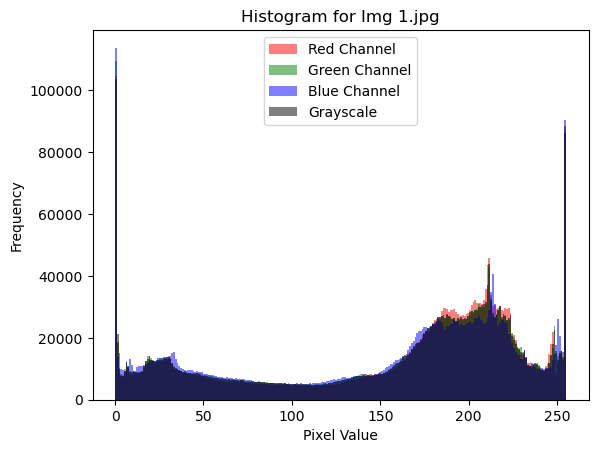

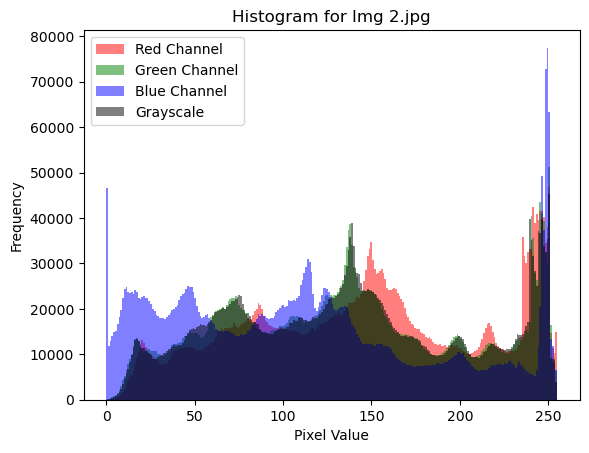

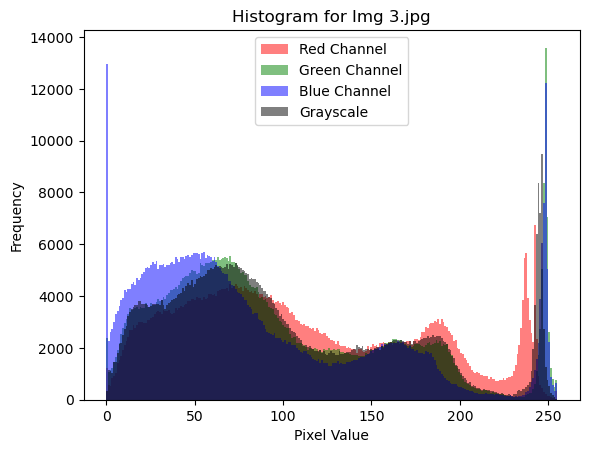

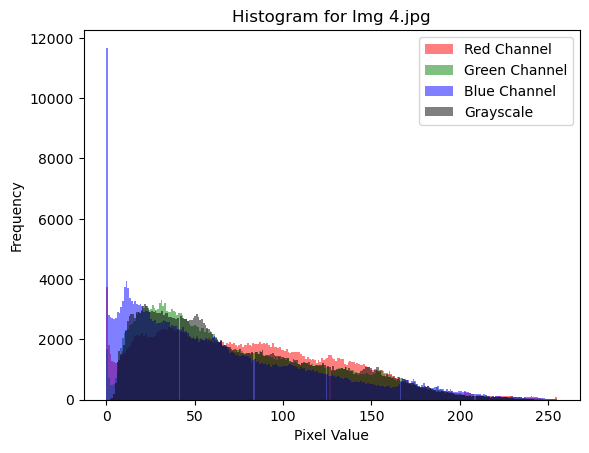

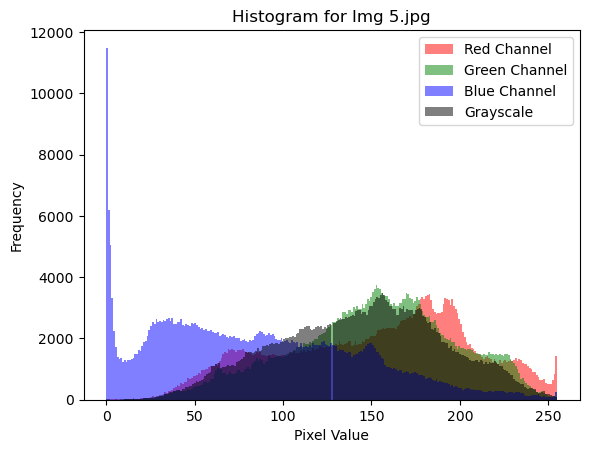

In [39]:
# Function to compute and plot histograms
def plot_histograms(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)

    # Compute histograms for each color channel
    colors = ('red', 'green', 'blue')
    for i, color in enumerate(colors):
        channel_data = image_array[..., i].flatten()
        plt.hist(channel_data, bins=256, color=color, alpha=0.5, label=f'{color.capitalize()} Channel')
    
    # Compute and plot histogram for grayscale
    grayscale = np.array(image.convert("L")).flatten()
    plt.hist(grayscale, bins=256, color='black', alpha=0.5, label='Grayscale')
    
    plt.title(f"Histogram for {image_path}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Example usage
plot_histograms("Img 1.jpg")
plot_histograms("Img 2.jpg")
plot_histograms("Img 3.jpg")
plot_histograms("Img 4.jpg")
plot_histograms("Img 5.jpg")

In [41]:
# Function to display size and position analysis in a clean format
def display_clean_results(size_position_results):
    for result in size_position_results:
        print(f"Image: {result['Image']}")
        print(f"Model: {result['Model']}")
        if result["Size and Position"]:
            # Create a table for size and position
            table = [
                {
                    "Object": idx + 1,
                    "Width": obj["Width"],
                    "Height": obj["Height"],
                    "Area": obj["Area"],
                    "Centroid X": obj["Centroid"][0],
                    "Centroid Y": obj["Centroid"][1],
                }
                for idx, obj in enumerate(result["Size and Position"])
            ]
            print(tabulate(table, headers="keys", tablefmt="fancy_grid"))
        else:
            print("No objects detected.")
        print("-" * 60)

# Collecting and displaying results
size_position_results = []

for image_path in image_paths:
    image = Image.open(image_path)
    image_tensor = F.to_tensor(image)

    # --- Faster R-CNN ---
    with torch.no_grad():
        faster_predictions = faster_rcnn([image_tensor])
    faster_boxes = faster_predictions[0]['boxes'][faster_predictions[0]['scores'] >= confidence_threshold]
    faster_size_position_info = analyze_size_and_position(faster_boxes.tolist())

    size_position_results.append({
        "Image": image_path,
        "Model": "Faster R-CNN",
        "Size and Position": faster_size_position_info
    })

    # --- YOLO ---
    yolo_results = yolo_model(image_path)
    yolo_detections = yolo_results[0]

    if yolo_detections.boxes:
        yolo_size_position_info = analyze_size_and_position(yolo_detections.boxes.xyxy.cpu().numpy().tolist())
    else:
        yolo_size_position_info = []

    size_position_results.append({
        "Image": image_path,
        "Model": "YOLOv8",
        "Size and Position": yolo_size_position_info
    })

# Display results in a cleaner format
display_clean_results(size_position_results)


image 1/1 /Users/dovekerry/Img 1.jpg: 416x640 1 suitcase, 1 bottle, 1 chair, 1 couch, 3 potted plants, 2 tvs, 1 book, 4 clocks, 2 vases, 199.9ms
Speed: 1.9ms preprocess, 199.9ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /Users/dovekerry/Img 2.jpg: 480x640 1 person, 5 chairs, 11 potted plants, 3 dining tables, 1 oven, 1 book, 1 vase, 199.3ms
Speed: 2.3ms preprocess, 199.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /Users/dovekerry/Img 3.jpg: 640x512 1 bicycle, 245.9ms
Speed: 1.3ms preprocess, 245.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /Users/dovekerry/Img 4.jpg: 384x640 8 persons, 8 umbrellas, 6 chairs, 2 potted plants, 169.4ms
Speed: 1.0ms preprocess, 169.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/dovekerry/Img 5.jpg: 448x640 2 persons, 1 dog, 1 sports ball, 1 dining table, 166.3ms
Speed: 1.2ms preprocess, 166.3ms inference, 0.5ms po